In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
!pip install kaggle 
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 805M/812M [00:07<00:00, 170MB/s]
100% 812M/812M [00:07<00:00, 119MB/s]


In [5]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [6]:
!unzip /content/test1.zip
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [14]:
%%bash
mkdir train/0
mkdir train/1

In [16]:
%%bash
mv /content/train/cat* /content/train/0 && mv /content/train/dog* /content/train/1

In [17]:
!mkdir -p test/0 test/1

In [20]:
%%bash
# move 10% of "cat" images to tester/0
mv $(ls /content/train/0/cat* | shuf -n $(($(ls /content/train/0/cat* | wc -l)*10/100))) /content/test/0/

# move 10% of "dog" images to tester/1
mv $(ls /content/train/1/dog* | shuf -n $(($(ls /content/train/1/dog* | wc -l)*10/100))) /content/test/1/

In [12]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/test", target_size=(224,224))

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [10]:
!mkdir data

In [11]:
!mkdir test

In [23]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



In [24]:
from keras.optimizers import Adam
opt=Adam(lr=0.001)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('vgg16_1.h5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',period=1)
early=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=20,verbose=1,mode='auto')


In [5]:
from keras.applications import VGG16

In [6]:
VGG = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
VGG.trainable=False

In [8]:
model=Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history=model.fit_generator(steps_per_epoch=100,generator=traindata,validation_data=testdata,validation_steps=10,epochs=100,callbacks=[checkpoint,early])

<ipython-input-15-dabefb466525>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(steps_per_epoch=100,generator=traindata,validation_data=testdata,validation_steps=10,epochs=100,callbacks=[checkpoint,early])


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 1.6872 - accuracy: 0.9159
Epoch 1: val_accuracy improved from -inf to 0.95312, saving model to vgg16_1.h5
100/100 [==============================] - 26s 163ms/step - loss: 1.6872 - accuracy: 0.9159 - val_loss: 0.4179 - val_accuracy: 0.9531
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.9612
Epoch 2: val_accuracy improved from 0.95312 to 0.96875, saving model to vgg16_1.h5
100/100 [==============================] - 18s 179ms/step - loss: 0.2565 - accuracy: 0.9612 - val_loss: 0.1709 - val_accuracy: 0.9688
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.1739 - accuracy: 0.9644
Epoch 3: val_accuracy improved from 0.96875 to 0.98438, saving model to vgg16_1.h5
100/100 [==============================] - 16s 158ms/step - loss: 0.1739 - accuracy: 0.9644 - val_loss: 0.1047 - val_accuracy: 0.9844
Epoch 4/100
100/100 [==============================] - ETA: 0

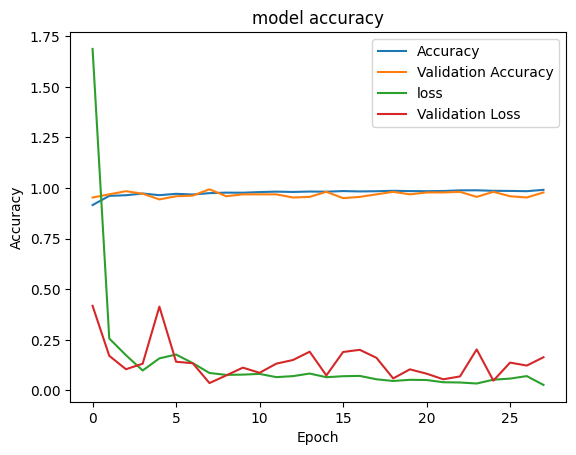

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 [==============================] - 0s 218ms/step
cat


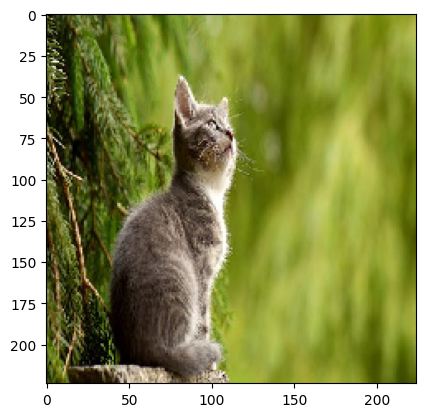

In [25]:
from keras.preprocessing import image 
from keras.utils import load_img
img = load_img("/content/cat-2083492__340.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)  
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')
